# Alunos

Renato Barboza da Costa - rbc4

Nicolau Neto - ntsn



# Coleta de dados:





##Datasets utilizados

https://www.kaggle.com/datasets/varpit94/bitcoin-data-updated-till-26jun2021

https://www.kaggle.com/datasets/varpit94/ethereum-data


# Descrição dos datasets

Dados sobre os valores das criptomoedas Bitcoin/Ethereum ao longo do tempo com suas altas, baixas, valores de fechamento do dia e volume de criptomoedas no mercado


# Importando libs

In [ ]:
import numpy as np
import pandas as pd
from numpy import log10
import matplotlib.pyplot as plt
%matplotlib inline

# Extração de dados

In [ ]:
df_btc = pd.read_csv("BTC-USD.csv",sep=",")
df_eth = pd.read_csv("ETH-USD.csv",sep=",")

# Visualização de dados

## Bitcoin

In [ ]:
df_btc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069
2745,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291


## Ethereum

In [ ]:
df_eth

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1593,2022-03-21,2860.103271,2954.556641,2838.250488,2897.976563,2897.976563,15206116098
1594,2022-03-22,2897.774170,3040.382813,2892.544434,2973.131104,2973.131104,16830539230
1595,2022-03-23,2973.145020,3036.752197,2933.306641,3031.067139,3031.067139,16008767658
1596,2022-03-24,3031.060791,3118.387695,3012.326660,3108.062012,3108.062012,18070503166


# Verificando ausência de dados em ambos datasets

In [ ]:
print(df_btc.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
print(df_eth.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Limpeza de dados

Analisando coluna por coluna, mostrando a quantidade de dados nulos do DataFrame, número total de entradas e datatypes de cada feature.

In [ ]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [ ]:
df_eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1598 non-null   object 
 1   Open       1598 non-null   float64
 2   High       1598 non-null   float64
 3   Low        1598 non-null   float64
 4   Close      1598 non-null   float64
 5   Adj Close  1598 non-null   float64
 6   Volume     1598 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 87.5+ KB


# Eliminando possíveis valores duplicados

Como vimos abaixo, não tivemos nenhum dado duplicado

In [ ]:
#verificando tamanho inicial dos datasets
df_btc_rows = len(df_btc)
df_eth_rows = len(df_eth)

print('Quantidade de linhas do dataframe (BTC):', str(df_btc_rows))
print('Quantidade de linhas do dataframe (ETH):', str(df_eth_rows))

Quantidade de linhas do dataframe (BTC): 2747
Quantidade de linhas do dataframe (ETH): 1598


In [ ]:
# Limpando dataframe BTC
df_btc = df_btc.drop_duplicates()
df_btc_rows = len(df_btc)

# Limpando dataframe ETH
df_eth = df_eth.drop_duplicates()
df_eth_rows = len(df_eth)

print('Quantidade de linhas após limpeza (BTC):', str(df_btc_rows))
print('Quantidade de linhas após limpeza (ETH):', str(df_eth_rows))

Quantidade de linhas após limpeza (BTC): 2747
Quantidade de linhas após limpeza (ETH): 1598


# Limpeza dos dados discrepantes

## Verificando valores negativos

## BTC

In [ ]:
# Analisando para o preço de baixa
df_btc[(df_btc['Low'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando para o preço de alta
df_btc[(df_btc['High'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe volume abaixo de zero
df_btc[(df_btc['Volume'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Abertura abaixo de zero
df_btc[(df_btc['Open'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Fechamento de mercado abaixo de zero
df_btc[(df_btc['Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Algum preço de fechamento ajustado abaixo de zero
df_btc[(df_btc['Adj Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


## ETH

In [ ]:
# Analisando para o preço de baixa
df_eth[(df_eth['Low'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando para o preço de alta
df_eth[(df_eth['High'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe volume abaixo de zero
df_eth[(df_eth['Volume'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Abertura abaixo de zero
df_eth[(df_eth['Open'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Fechamento de mercado abaixo de zero
df_eth[(df_eth['Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
# Analisando se existe Algum preço de fechamento ajustado abaixo de zero
df_eth[(df_eth['Adj Close'] < 0)][['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

,Date,Open,High,Low,Close,Adj Close,Volume


# Limpeza de dados

Vamos tratar os outliers, que seriam os dados que fogem muito do nosso padrão e que por conta disso acabam dificultando o processo de generalização do seu modelo de predição

Vamos analisar as estatísticas dos nossos datasets usando o `describe()`

E utilizaremos a média do Volume para analisar os dados, descartando valores de volume elevados e baixos

In [ ]:
# BTC 
df_btc['Volume'].describe()

count    2.336000e+03
mean     8.415480e+09
std      1.059997e+10
min      5.914570e+06
25%      6.487818e+07
50%      3.389730e+09
75%      1.646926e+10
max      3.474671e+10
Name: Volume, dtype: float64

In [ ]:
# ETH
df_eth['Volume'].describe()

count    1.347000e+03
mean     9.267000e+09
std      6.431378e+09
min      1.235820e+09
25%      2.842835e+09
50%      8.072368e+09
75%      1.416474e+10
max      2.364543e+10
Name: Volume, dtype: float64

# Removendo Outliers de volume

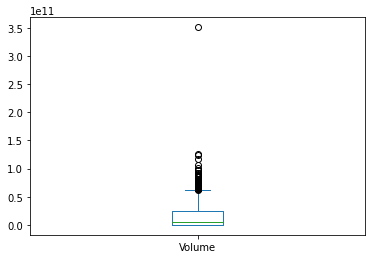

In [ ]:
# BTC Outliers
df_btc['Volume'].plot.box()

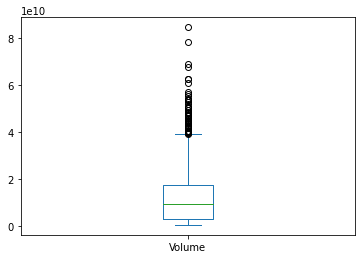

In [ ]:
# ETH Outliers
df_eth['Volume'].plot.box()

In [ ]:
# Definindo exclusão de outliers para valores maiores saiam da curva para mais ou para menos
def delete_volume_outliers(DataFrame):
  interval = DataFrame['Volume'].std()
  media = DataFrame['Volume'].mean()
  DataFrame.loc[DataFrame['Volume'] < (media - interval), 'Volume'] = np.nan
  DataFrame.loc[DataFrame['Volume'] > (media + interval), 'Volume'] = np.nan

delete_volume_outliers(df_btc)
delete_volume_outliers(df_eth)

# Dados após a eliminação dos outliers

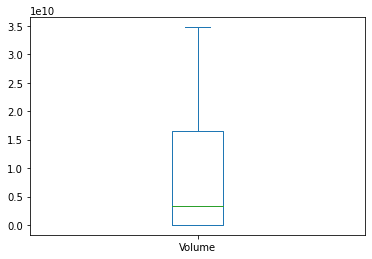

In [ ]:
# BTC Outliers
df_btc['Volume'].plot.box()

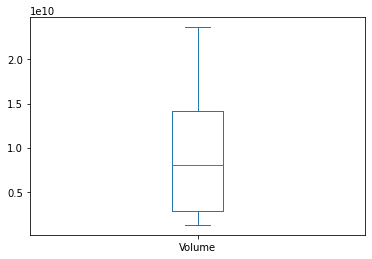

In [ ]:
# ETH Outliers
df_eth['Volume'].plot.box()

# Comparativo de preços após limpeza de dados

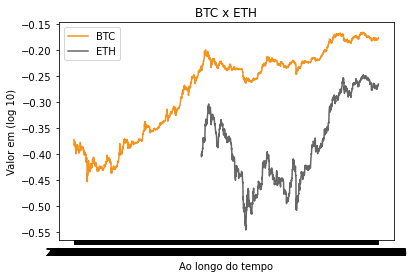

In [ ]:
df_btc['Close'] = log10(df_btc['Close'])
df_eth['Close'] = log10(df_eth['Close'])

plt.plot(df_btc['Date'], df_btc['Close'], color='#f7931a', label='BTC') 
plt.plot(df_eth['Date'], df_eth['Close'], color='#666666', label='ETH') 

plt.xlabel("Ao longo do tempo") 
plt.ylabel("Valor em (log 10)") 

plt.title("BTC x ETH") 

plt.legend() 
plt.show()